In [4]:
# Project: EDA for the movieDB data
# names: Rawan Alahmadi, Morooj Aldeeb
# Date: 10/14/2021

In [5]:
import pandas as pd
import numpy as np
import sklearn as sn
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

In [6]:
#Loading the movies data into a df

movie_df = pd.read_csv(r"C:\Users\rawan\Desktop\project2\moviesData.csv")

In [7]:
movie_df.shape

(3621, 12)

In [8]:
movie_df.head()

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue,url
0,Venom: Let There Be Carnage,580489,9/30/2021,1h 37m,2,"Science Fiction,Action",72.0,9,English,"110,000,000.00","191,000,000.00",https://www.themoviedb.org/movie/580489
1,Free Guy,550988,8/11/2021,1h 55m,4,"Comedy,Action,Adventure,Science Fiction",78.0,10,English,"110,000,000.00","324,000,000.00",https://www.themoviedb.org/movie/550988
2,Venom,335983,9/28/2018,1h 52m,2,"Science Fiction,Action",68.0,13,English,"116,000,000.00","855,013,954.00",https://www.themoviedb.org/movie/335983
3,The Addams Family 2,639721,10/1/2021,1h 33m,3,"Animation,Comedy,Family",76.0,2,English,NaN,"40,000,000.00",https://www.themoviedb.org/movie/639721
4,Snake Eyes: G.I. Joe Origins,568620,7/22/2021,2h 1m,2,"Action,Adventure",69.0,13,English,"88,000,000.00","36,964,325.00",https://www.themoviedb.org/movie/568620


In [9]:
movie_df.tail()

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue,url
3616,Monster High: Haunted,324963,3/2/2015,1h 15m,3,"Animation,Family,Fantasy",73.0,2,English,NaN,NaN,https://www.themoviedb.org/movie/324963
3617,Safe,72387,4/16/2012,1h 34m,3,"Action,Crime,Thriller",65.0,3,English,"30,000,000.00","40,346,186.00",https://www.themoviedb.org/movie/72387
3618,Sniper: Ghost Shooter,407375,8/2/2016,1h 40m,3,"Action,Drama,War",66.0,12,English,"3,000,000.00",NaN,https://www.themoviedb.org/movie/407375
3619,The Thin Red Line,8741,3/5/1998,2h 51m,3,"Drama,History,War",75.0,25,English,"52,000,000.00","98,126,565.00",https://www.themoviedb.org/movie/8741
3620,Guns Akimbo,457335,2/27/2020,1h 35m,2,"Comedy,Action",65.0,12,English,NaN,"835,102.00",https://www.themoviedb.org/movie/457335


In [10]:
movie_df.sample(5)

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue,url
2389,The Prestige,1124,10/19/2006,2h 10m,3,"Drama,Mystery,Thriller",82.0,16,English,"40,000,000.00","109,676,311.00",https://www.themoviedb.org/movie/1124
3587,RoboCop 2,5549,6/22/1990,1h 57m,5,"Action,Adventure,Crime,Science Fiction,Thriller",60.0,8,English,"35,000,000.00","45,681,173.00",https://www.themoviedb.org/movie/5549
2342,Kizumonogatari Part 1: Tekketsu,357786,1/8/2016,1h 4m,5,"Mystery,Animation,Fantasy,Horror,Action",78.0,10,Japanese,NaN,NaN,https://www.themoviedb.org/movie/357786
2346,The Grudge 2,1975,10/13/2006,1h 42m,2,"Horror,Thriller",55.0,4,English,"20,000,000.00","39,143,839.00",https://www.themoviedb.org/movie/1975
397,Aquaslash,607383,7/29/2019,1h 12m,2,"Horror,Comedy",40.0,0,English,NaN,NaN,https://www.themoviedb.org/movie/607383


In [11]:
# Stripping spaces from columns

movie_df = movie_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
movie_df.head()

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue,url
0,Venom: Let There Be Carnage,580489,9/30/2021,1h 37m,2,"Science Fiction,Action",72.0,9,English,"110,000,000.00","191,000,000.00",https://www.themoviedb.org/movie/580489
1,Free Guy,550988,8/11/2021,1h 55m,4,"Comedy,Action,Adventure,Science Fiction",78.0,10,English,"110,000,000.00","324,000,000.00",https://www.themoviedb.org/movie/550988
2,Venom,335983,9/28/2018,1h 52m,2,"Science Fiction,Action",68.0,13,English,"116,000,000.00","855,013,954.00",https://www.themoviedb.org/movie/335983
3,The Addams Family 2,639721,10/1/2021,1h 33m,3,"Animation,Comedy,Family",76.0,2,English,NaN,"40,000,000.00",https://www.themoviedb.org/movie/639721
4,Snake Eyes: G.I. Joe Origins,568620,7/22/2021,2h 1m,2,"Action,Adventure",69.0,13,English,"88,000,000.00","36,964,325.00",https://www.themoviedb.org/movie/568620


In [12]:
# replacing commas with '', and '-' with NaN

movie_df["budget"]=movie_df["budget"].str.replace(',','')
movie_df["revenue"]=movie_df["revenue"].str.replace(',','')
movie_df.head()

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue,url
0,Venom: Let There Be Carnage,580489,9/30/2021,1h 37m,2,"Science Fiction,Action",72.0,9,English,110000000.00,191000000.00,https://www.themoviedb.org/movie/580489
1,Free Guy,550988,8/11/2021,1h 55m,4,"Comedy,Action,Adventure,Science Fiction",78.0,10,English,110000000.00,324000000.00,https://www.themoviedb.org/movie/550988
2,Venom,335983,9/28/2018,1h 52m,2,"Science Fiction,Action",68.0,13,English,116000000.00,855013954.00,https://www.themoviedb.org/movie/335983
3,The Addams Family 2,639721,10/1/2021,1h 33m,3,"Animation,Comedy,Family",76.0,2,English,NaN,40000000.00,https://www.themoviedb.org/movie/639721
4,Snake Eyes: G.I. Joe Origins,568620,7/22/2021,2h 1m,2,"Action,Adventure",69.0,13,English,88000000.00,36964325.00,https://www.themoviedb.org/movie/568620


In [13]:
# Checking nulls

movie_df.isnull()

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue,url
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3616,False,False,False,False,False,False,False,False,False,False,False,False
3617,False,False,False,False,False,False,False,False,False,False,False,False
3618,False,False,False,False,False,False,False,False,False,False,False,False
3619,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Checking data types

movie_df.dtypes

title            object
id                int64
release_date     object
duration         object
genre_count       int64
genre            object
rating          float64
keywords          int64
language         object
budget           object
revenue          object
url              object
dtype: object

In [15]:
#converting duration to minutes

movie_df['duration']= movie_df['duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
movie_df.head()

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue,url
0,Venom: Let There Be Carnage,580489,9/30/2021,97,2,"Science Fiction,Action",72.0,9,English,110000000.00,191000000.00,https://www.themoviedb.org/movie/580489
1,Free Guy,550988,8/11/2021,115,4,"Comedy,Action,Adventure,Science Fiction",78.0,10,English,110000000.00,324000000.00,https://www.themoviedb.org/movie/550988
2,Venom,335983,9/28/2018,112,2,"Science Fiction,Action",68.0,13,English,116000000.00,855013954.00,https://www.themoviedb.org/movie/335983
3,The Addams Family 2,639721,10/1/2021,93,3,"Animation,Comedy,Family",76.0,2,English,NaN,40000000.00,https://www.themoviedb.org/movie/639721
4,Snake Eyes: G.I. Joe Origins,568620,7/22/2021,121,2,"Action,Adventure",69.0,13,English,88000000.00,36964325.00,https://www.themoviedb.org/movie/568620


In [16]:
# Changing the type of some of the columns

movie_df.genre_count= movie_df.genre_count.astype('float')
movie_df.keywords = movie_df.keywords.astype('float')
movie_df.revenue = movie_df.revenue.astype('float')
movie_df.budget = movie_df.budget.astype('float')

movie_df.dtypes

title            object
id                int64
release_date     object
duration          int64
genre_count     float64
genre            object
rating          float64
keywords        float64
language         object
budget          float64
revenue         float64
url              object
dtype: object

In [17]:
# Dropping the unnecessary column

movie_df = movie_df.drop(["url"], axis=1)
movie_df.head()

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue
0,Venom: Let There Be Carnage,580489,9/30/2021,97,2.0,"Science Fiction,Action",72.0,9.0,English,110000000.0,191000000.0
1,Free Guy,550988,8/11/2021,115,4.0,"Comedy,Action,Adventure,Science Fiction",78.0,10.0,English,110000000.0,324000000.0
2,Venom,335983,9/28/2018,112,2.0,"Science Fiction,Action",68.0,13.0,English,116000000.0,855013954.0
3,The Addams Family 2,639721,10/1/2021,93,3.0,"Animation,Comedy,Family",76.0,2.0,English,NaN,40000000.0
4,Snake Eyes: G.I. Joe Origins,568620,7/22/2021,121,2.0,"Action,Adventure",69.0,13.0,English,88000000.0,36964325.0


In [18]:
# Checking the Shape

movie_df.shape

(3621, 11)

In [19]:
# Checking duplicate data

duplicate_df = movie_df[movie_df.duplicated()]
print('number of duplicate rows:' , duplicate_df.shape)

number of duplicate rows: (0, 11)


In [20]:
# Checking nulls

print(movie_df.isnull().sum())

title              0
id                 0
release_date       0
duration           0
genre_count        0
genre              0
rating            52
keywords           0
language          17
budget          1555
revenue         1512
dtype: int64


In [21]:
movie_df.count()

title           3621
id              3621
release_date    3621
duration        3621
genre_count     3621
genre           3621
rating          3569
keywords        3621
language        3604
budget          2066
revenue         2109
dtype: int64

In [22]:
# Dropping missing values

movie_df = movie_df.dropna() 
movie_df.count()

title           1871
id              1871
release_date    1871
duration        1871
genre_count     1871
genre           1871
rating          1871
keywords        1871
language        1871
budget          1871
revenue         1871
dtype: int64

In [23]:
# After dropping the null values

print(movie_df.isnull().sum()) 

title           0
id              0
release_date    0
duration        0
genre_count     0
genre           0
rating          0
keywords        0
language        0
budget          0
revenue         0
dtype: int64


<AxesSubplot:xlabel='revenue'>

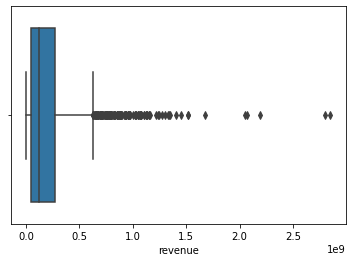

In [24]:
# Checking outliaers

sns.boxplot(x= movie_df['revenue'])

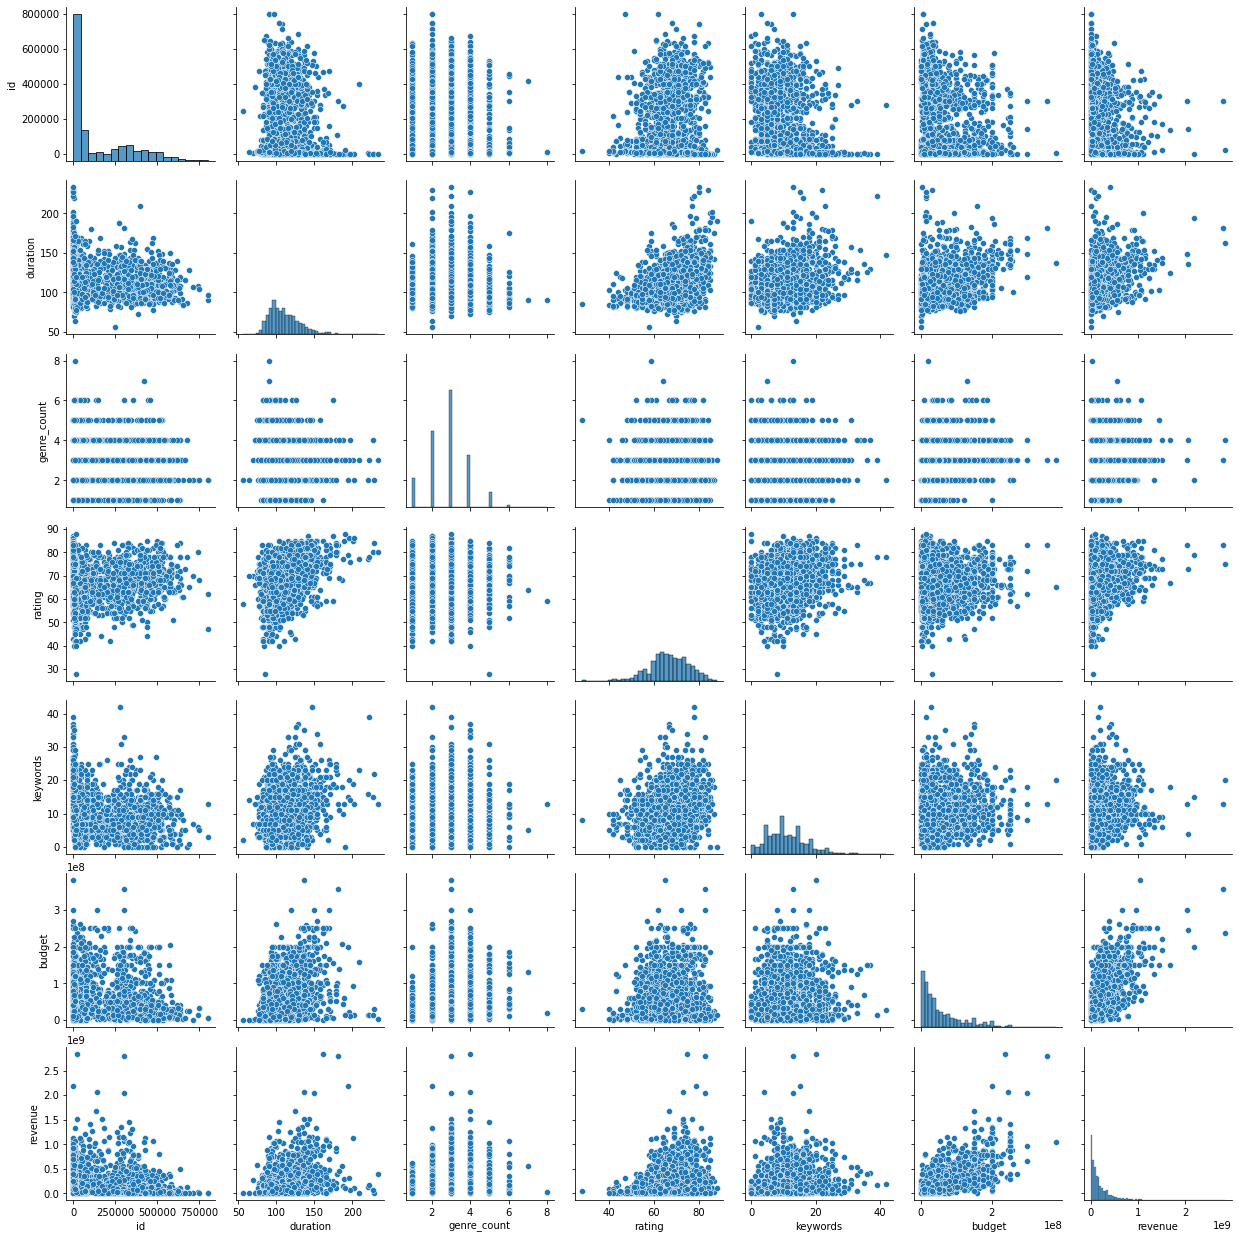

In [25]:
sns.pairplot(movie_df)

In [26]:
import pickle

In [27]:
movie_df.to_pickle('MyMovies_clean.pkl')